In [1]:
import re
import os
import math
import nltk
import time
import re
import string
import pandas as pd
from nltk.corpus import stopwords

In [2]:
# you can use the imports below
# include any other imports you need here
# you may have to install gensim using "pip install gensim"
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [3]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [4]:
import tensorflow as tf

In [5]:
#In this body of code, we have taken first 5000 rows of our original dataset to implement a code to test Regex, data cleaning
#Tokenization, stop words elimination - all operations on the "Bio" column of the data frame so that user profile data
#can be used in further analysis in the remaining stages. 

#In this version of development file the model has been scaled to include 10,850 user profiles for the analysis. 
#We couldn't run more models because of system constraints as testing the model with 25000 and 46000 profile data caused memory error

In [6]:
## RNN model - development

In [7]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [8]:
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
import multiprocessing

cores = multiprocessing.cpu_count()

In [11]:
df_dating_RNN = pd.read_excel (r'C:\Users\mohit\Dropbox\PhD Rutgers University\Fall 2021 Course Material\Statistical Learning for Data science\Project\Data Cleaning\test1\Input_project_v11_age.xlsx')
print(df_dating_RNN)

       age age_group  status sex orientation       body_type  \
0       22     18_22  single   m    straight  a little extra   
1       22     18_22  single   f    straight        athletic   
2       22     18_22  single   m    straight             fit   
3       20     18_22  single   f    straight         average   
4       21     18_22  single   m    straight            thin   
...    ...       ...     ...  ..         ...             ...   
10845   65       51+  single   f    straight             fit   
10846   55       51+  single   f    straight    full figured   
10847   51       51+  single   m    straight         average   
10848   65       51+  single   f    straight           curvy   
10849   60       51+  single   m    straight         average   

                    diet    drinks  drinks_freq  drugs  ...  \
0      strictly anything  socially            1  never  ...   
1                    NaN  socially            1  never  ...   
2        mostly anything  socially        

In [12]:
df_dating_RNN = df_dating_RNN[df_dating_RNN['Bio'].notna()]

In [13]:
df_dating_RNN.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
df_dating_RNN["Bio"] = df_dating_RNN["Bio"].str.lower()

In [14]:
import nltk

df_dating_RNN['Bio'] = df_dating_RNN['Bio'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
df_dating_RNN['Bio'] = df_dating_RNN['Bio'].str.replace(".", "").str.replace(",", "").str.strip()
df_dating_RNN['Bio'] = df_dating_RNN['Bio'].str.replace(")", "").str.replace("(", "").str.strip()
df_dating_RNN['Bio'] = df_dating_RNN['Bio'].str.replace("!@#$%^&*\(\)\[]\{};:,./<>?\|`~=_+", "").str.strip()

<ipython-input-14-bac68a18b7dd>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_dating_RNN['Bio'] = df_dating_RNN['Bio'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
<ipython-input-14-bac68a18b7dd>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_dating_RNN['Bio'] = df_dating_RNN['Bio'].str.replace(".", "").str.replace(",", "").str.strip()
<ipython-input-14-bac68a18b7dd>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_dating_RNN['Bio'] = df_dating_RNN['Bio'].str.replace(")", "").str.replace("(", "").str.strip()
<ipython-input-14-bac68a18b7dd>:6: FutureWarning: The default value of regex will change from

In [15]:
df_dating_top_RNN = df_dating_RNN.head()
df_dating_top_RNN

,age,age_group,status,sex,orientation,body_type,diet,drinks,drinks_freq,drugs,...,job_group,last_online,location,offspring,pets,religion,sign,smokes,speaks,Bio
0,22,18_22,single,m,straight,a little extra,strictly anything,socially,1,never,...,blue_collar,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me i would love to think that i was some...
1,22,18_22,single,f,straight,athletic,NaN,socially,1,never,...,student,2012-06-15-22-56,"san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,catholicism and somewhat serious about it,taurus but it doesn&rsquo;t matter,no,"english (fluently), spanish (fluently), italia...",my name is ashley and i live in san francisco ...
2,22,18_22,single,m,straight,fit,mostly anything,socially,1,never,...,business,2012-06-10-01-37,"san francisco, california",NaN,likes dogs and dislikes cats,catholicism and laughing about it,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), tagalog (fluently), japane...",fulltime student fulltime square i change from...
3,20,18_22,single,f,straight,average,mostly vegetarian,socially,1,never,...,blue_collar,2012-06-30-00-00,"san rafael, california",doesn't want kids,has dogs and likes cats,NaN,cancer,no,"english (fluently), spanish (fluently)",apparently has become a new favorite word of m...
4,21,18_22,single,m,straight,thin,NaN,socially,1,NaN,...,s.t.e.m.,2012-06-29-22-10,"san francisco, california",NaN,NaN,buddhism,NaN,when drinking,english,i grew up in iowa it gets a bad rap but let me...


In [16]:
#Clean text Bio
bio_token_LR= pd.DataFrame(df_dating_RNN, columns = ['Bio'])
print(bio_token_LR[0:5])

                                                 Bio
0  about me i would love to think that i was some...
1  my name is ashley and i live in san francisco ...
2  fulltime student fulltime square i change from...
3  apparently has become a new favorite word of m...
4  i grew up in iowa it gets a bad rap but let me...


In [17]:
# Let's check the dimensions of the dataframe
print(df_dating_RNN.shape)
print()
# let's look at the statistical aspects of the dataframe
print(df_dating_RNN.describe())
print()
# Let's see the type of each column
print(df_dating_RNN.info())

(10551, 25)

                age   drinks_freq        height
count  10551.000000  10551.000000  10551.000000
mean      34.475310      0.816510     68.247275
std       12.572841      0.387086      3.914318
min       18.000000      0.000000     36.000000
25%       24.000000      1.000000     65.000000
50%       30.000000      1.000000     68.000000
75%       44.000000      1.000000     71.000000
max       69.000000      1.000000     95.000000

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10551 entries, 0 to 10849
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              10551 non-null  int64 
 1   age_group        10551 non-null  object
 2   status           10551 non-null  object
 3   sex              10551 non-null  object
 4   orientation      10551 non-null  object
 5   body_type        9875 non-null   object
 6   diet             6861 non-null   object
 7   drinks           10551 non-null  ob

In [18]:
import pandas as pd
from nltk import word_tokenize

In [19]:
data = df_dating_RNN['Bio'].map(word_tokenize).values
total_vocabulary = set(word.lower() for tweet in data for word in tweet)  # set created from nested comprehension 

In [20]:
len(total_vocabulary)

92701

In [21]:
print(data)

[list(['about', 'me', 'i', 'would', 'love', 'to', 'think', 'that', 'i', 'was', 'some', 'some', 'kind', 'of', 'intellectual', 'either', 'the', 'dumbest', 'smart', 'guy', 'or', 'the', 'smartest', 'dumb', 'guy', 'cant', 'say', 'i', 'can', 'tell', 'the', 'difference', 'i', 'love', 'to', 'talk', 'about', 'ideas', 'and', 'concepts', 'i', 'forge', 'odd', 'metaphors', 'instead', 'of', 'reciting', 'cliches', 'like', 'the', 'simularities', 'between', 'a', 'friend', 'of', 'mines', 'house', 'and', 'an', 'underwater', 'salt', 'mine', 'my', 'favorite', 'word', 'is', 'salt', 'by', 'the', 'way', 'weird', 'choice', 'i', 'know', 'to', 'me', 'most', 'things', 'in', 'life', 'are', 'better', 'as', 'metaphors', 'i', 'seek', 'to', 'make', 'myself', 'a', 'little', 'better', 'everyday', 'in', 'some', 'productively', 'lazy', 'way', 'got', 'tired', 'of', 'tying', 'my', 'shoes', 'considered', 'hiring', 'a', 'five', 'year', 'old', 'but', 'would', 'probably', 'have', 'to', 'tie', 'both', 'of', 'our', 'shoes', 'deci

In [22]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

# set the emotion/sentiment as our target
target = df_dating_RNN['age_group']

# use one hot encoding since our target is categorical
y = pd.get_dummies(target).values

# use keras to create a Tokenizer object
tokenizer = text.Tokenizer(num_words=40000)  # limit to the num_words most important ones
tokenizer.fit_on_texts(list(df_dating_RNN['Bio']))
tokenized_texts = tokenizer.texts_to_sequences(df_dating_RNN['Bio'])
X = sequence.pad_sequences(tokenized_texts, maxlen=1000)

In [23]:
np.unique(target)

array(['18_22', '23_27', '28_32', '33_45', '46_50', '51+'], dtype=object)

In [24]:
print(y)

[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


In [25]:
np.unique(y)

array([0, 1], dtype=uint8)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test1 = train_test_split(X, y, test_size=0.2)

# create my NN model
model = Sequential()

embedding_size = 128
model.add(Embedding(len(total_vocabulary), embedding_size))
model.add(LSTM(25, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))  # use 6 because we have 6 categories

In [27]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary() # check the shape

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         11865728  
                                                                 
 lstm (LSTM)                 (None, None, 25)          15400     
                                                                 
 global_max_pooling1d (Globa  (None, 25)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense (Dense)               (None, 50)                1300      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                        

In [28]:
np.unique(y_train)

array([0, 1], dtype=uint8)

In [29]:
print(y_train)

[[0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]]


In [30]:
history = model.fit(X_train, y_train, epochs=10, batch_size= 32, validation_split=0.1)

Epoch 1/10
238/238 [==============================] - 79s 326ms/step - loss: 1.7767 - accuracy: 0.1888 - val_loss: 1.7605 - val_accuracy: 0.2085
Epoch 2/10
238/238 [==============================] - 79s 334ms/step - loss: 1.7461 - accuracy: 0.2102 - val_loss: 1.6831 - val_accuracy: 0.2583
Epoch 3/10
238/238 [==============================] - 80s 337ms/step - loss: 1.6156 - accuracy: 0.2917 - val_loss: 1.5158 - val_accuracy: 0.3412
Epoch 4/10
238/238 [==============================] - 79s 334ms/step - loss: 1.4553 - accuracy: 0.3510 - val_loss: 1.4431 - val_accuracy: 0.3732
Epoch 5/10
238/238 [==============================] - 76s 321ms/step - loss: 1.2927 - accuracy: 0.4169 - val_loss: 1.4205 - val_accuracy: 0.3839
Epoch 6/10
238/238 [==============================] - 76s 321ms/step - loss: 1.1815 - accuracy: 0.4768 - val_loss: 1.4355 - val_accuracy: 0.3957
Epoch 7/10
238/238 [==============================] - 77s 322ms/step - loss: 1.0828 - accuracy: 0.5204 - val_loss: 1.6046 - val_ac

In [31]:
y_pred1 = model.predict(X_test) # get our predictions
print(y_pred1)

[[3.6407630e-03 5.9552714e-02 3.7643686e-01 5.0556487e-01 4.1230854e-02
  1.3573991e-02]
 [1.1846084e-03 1.9613860e-02 1.9961731e-01 5.7510817e-01 1.3601482e-01
  6.8461239e-02]
 [2.1470101e-05 4.1200250e-04 1.4994104e-02 2.3834209e-01 3.1475335e-01
  4.3147692e-01]
 ...
 [9.1746628e-01 8.2532756e-02 1.0065935e-06 8.4659666e-17 1.5070609e-28
  2.3763367e-35]
 [1.1166697e-01 5.2372557e-01 3.4743610e-01 1.7135805e-02 3.4204502e-05
  1.3017172e-06]
 [3.0534645e-03 1.0062203e-01 6.4776653e-01 2.4787247e-01 6.4958184e-04
  3.5906669e-05]]


In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
y_pred1=model.predict(X_test) 
y_pred1=np.argmax(y_pred1, axis=1)
y_test1=np.argmax(y_test1, axis=1)
cm = confusion_matrix(y_test1, y_pred1)
print(cm)

[[145 112  74  25   0   8]
 [ 53 131 140  69   0   8]
 [ 19  79 166 123   0  24]
 [  7  25  92 221   0  81]
 [  1   7  10  98   0 100]
 [  0   1  13  83   0 196]]


In [34]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [35]:
global set_labels
set_labels = np.unique(y_train)
print('The number of labels (unique) from the train_data set: ')
print(set_labels)

global set_test_labels
set_test_labels = np.unique(y_test1)
print('The number of labels (unique) from the test_data set: ')
print(set_test_labels)
#Size of the confusion matrix will be determined by knowing the unique values here

The number of labels (unique) from the train_data set: 
[0 1]
The number of labels (unique) from the test_data set: 
[0 1 2 3 4 5]


In [36]:
x = len(set_labels)
y = len(set_test_labels)
z = np.unique(target)
w= len(z)
print(x,y)

2 6


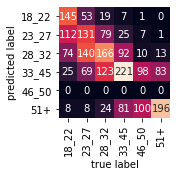

In [37]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test1, y_pred1)
plt.figure(figsize=(x,y))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels= z, yticklabels=z)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [38]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test1, y_pred1)

In [39]:
print(acc)

0.4069161534817622


In [40]:
print('Overall accuracy of RNN: {:.3f}'.format(acc))

Overall accuracy of RNN: 0.407


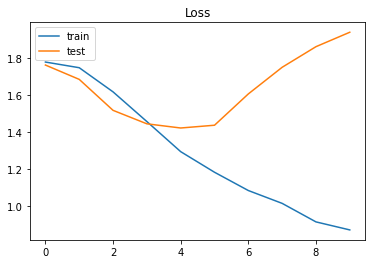

In [41]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

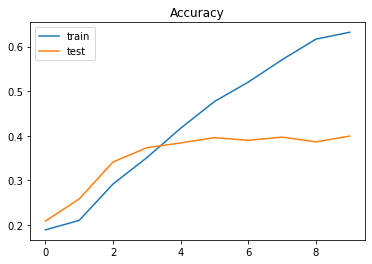

In [42]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [45]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
calc_train_error(X_train, y_train, model)

0.067817636

In [49]:
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    #predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred1)
    rmse = np.sqrt(mse)
    return mse

In [50]:
calc_validation_error(X_test, y_test1, model)

1.5561345333964947

In [51]:
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [52]:
calc_metrics(X_train, y_train, X_test, y_test1, model)

264/264 [==============================] - 86s 325ms/step - loss: 0.9700 - accuracy: 0.6045


(0.06459276, 1.5561345333964947)

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)

train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test1, lr)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

train error: 0.121 | test error: 1.556
train/test: 12.9


In [ ]:
#Training erorr is within 12%
#Validation Error is around 16% (poor performance on the test set)
#Model is slightly underfitting, because the train error is around 12% and validation error is also high around 16% 

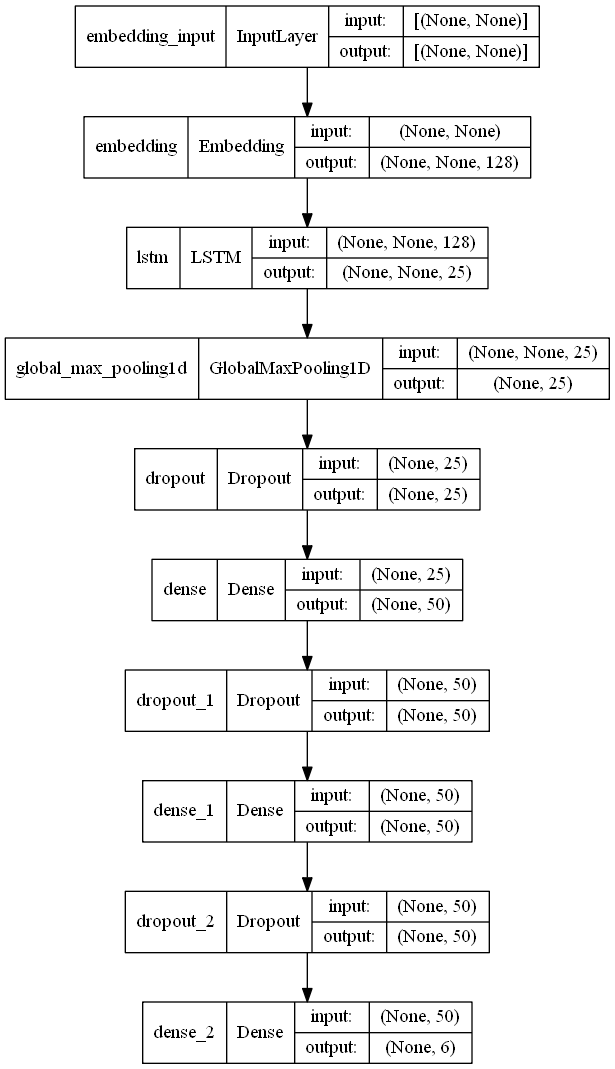

In [54]:
#Visualize the RNN architecture for the given model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names = True)